In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection and Information Using SQL


In [72]:
# create the table
import sqlite3
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)
conn = sqlite3.connect('database.db')
cursor = conn.cursor()
create_table = '''CREATE TABLE IF NOT EXISTS advertise(
                tv INTEGER PRIMARY KEY AUTOINCREMENT,
                radio INTEGER NOT NULL,
                newspaper INTEGER NOT NULL,
                sales INTEGER NOT NULL);
                '''
cursor.execute(create_table)
df.to_sql('advertise', conn, if_exists='replace', index = False)
pd.read_sql('SELECT * FROM advertise', conn)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [73]:
# show column names

conn = sqlite3.connect('database.db')
cursor = conn.cursor()
cursor.execute('PRAGMA table_info(advertise)')
columns_info = cursor.fetchall()
column_names = [column[1] for column in columns_info]
print("Column names:", column_names)
conn.close()

Column names: ['TV', 'radio', 'newspaper', 'sales']


In [74]:
# Tv column info
conn = sqlite3.connect('database.db')
tv_column = pd.read_sql('SELECT tv FROM advertise', conn)
print(tv_column)
conn.close()

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


In [75]:
# Radio column info
conn = sqlite3.connect('database.db')
radio_data = pd.read_sql('SELECT radio FROM advertise', conn)
print(radio_data)
conn.close()

     radio
0     37.8
1     39.3
2     45.9
3     41.3
4     10.8
..     ...
195    3.7
196    4.9
197    9.3
198   42.0
199    8.6

[200 rows x 1 columns]


In [76]:
# Newspaper column info
conn = sqlite3.connect('database.db')
newspaper_column = pd.read_sql('SELECT newspaper FROM advertise', conn)
print(newspaper_column)
conn.close()

     newspaper
0         69.2
1         45.1
2         69.3
3         58.5
4         58.4
..         ...
195       13.8
196        8.1
197        6.4
198       66.2
199        8.7

[200 rows x 1 columns]


In [77]:
# Sales column info
conn = sqlite3.connect('database.db')
sales_column = pd.read_sql('SELECT sales FROM advertise', conn)
print(sales_column)
conn.close()

     sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[200 rows x 1 columns]


In [78]:
# find how many entries are in the table
conn = sqlite3.connect('database.db')
row_count = conn.execute('SELECT COUNT(*) FROM advertise').fetchone()[0]
print(f"Total number of entries in the table: {row_count}")
conn.close()

Total number of entries in the table: 200


In [79]:
# Print the first five rows
conn = sqlite3.connect('database.db')
first_five_rows = pd.read_sql('SELECT * FROM advertise LIMIT 5', conn)
print("First five rows of the table:")
print(first_five_rows)
conn.close()

First five rows of the table:
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [80]:
# show row with the max sales
conn = sqlite3.connect('database.db')
max_sales_row = pd.read_sql('SELECT * FROM advertise WHERE sales = (SELECT MAX(sales) FROM advertise)', conn)
print("Row with the maximum sales:")
print(max_sales_row)
conn.close()


Row with the maximum sales:
      TV  radio  newspaper  sales
0  276.9   48.9       41.8   27.0


In [81]:
# show row values with the minimum sales
conn = sqlite3.connect('database.db')
min_sales_row = pd.read_sql('SELECT * FROM advertise WHERE sales = (SELECT MIN(sales) FROM advertise)', conn)
print("Row with the minimum sales:")
print(min_sales_row)
conn.close()

Row with the minimum sales:
    TV  radio  newspaper  sales
0  0.7   39.6        8.7    1.6


In [82]:
# find the average of all sales
conn = sqlite3.connect('database.db')
average_sales = conn.execute('SELECT AVG(sales) FROM advertise').fetchone()[0]
print(f"The average sales value is: {average_sales}")
conn.close()

The average sales value is: 14.0225


In [83]:
# find the average of tv, radio, newspaper. then find the max and min average of those three
conn = sqlite3.connect('database.db')
average_tv = conn.execute('SELECT AVG(tv) FROM advertise').fetchone()[0]
average_radio = conn.execute('SELECT AVG(radio) FROM advertise').fetchone()[0]
average_newspaper = conn.execute('SELECT AVG(newspaper) FROM advertise').fetchone()[0]
averages = {
    'tv': average_tv,
    'radio': average_radio,
    'newspaper': average_newspaper
}
max_average_column = max(averages, key=averages.get)
min_average_column = min(averages, key=averages.get)
print(f"Averages:\nTV: {average_tv}\nRadio: {average_radio}\nNewspaper: {average_newspaper}")
print(f"The highest average is in '{max_average_column}' with an average of {averages[max_average_column]}")
print(f"The lowest average is in '{min_average_column}' with an average of {averages[min_average_column]}")
conn.close()

Averages:
TV: 147.0425
Radio: 23.264
Newspaper: 30.554000000000002
The highest average is in 'tv' with an average of 147.0425
The lowest average is in 'radio' with an average of 23.264


In [70]:
# make another table that is ordered by highest to lowest sales
conn = sqlite3.connect('database.db')
conn.execute('''
    CREATE TABLE IF NOT EXISTS advertise_ordered AS 
    SELECT * FROM advertise
    ORDER BY sales DESC
''')
ordered_table = pd.read_sql('SELECT * FROM advertise_ordered', conn)
print("Table ordered by highest to minimum sales:")
print(ordered_table)
conn.close()

Table ordered by highest to minimum sales:
        TV  radio  newspaper  sales
0    276.9   48.9       41.8   27.0
1    287.6   43.0       71.8   26.2
2    283.6   42.0       66.2   25.5
3    266.9   43.8        5.0   25.4
4    289.7   42.3       51.2   25.4
..     ...    ...        ...    ...
195    5.4   29.9        9.4    5.3
196   13.1    0.4       25.6    5.3
197    8.6    2.1        1.0    4.8
198    4.1   11.6        5.7    3.2
199    0.7   39.6        8.7    1.6

[200 rows x 4 columns]


## Data Science Important Implementations:
1. Loading the data
2. Handling the missing values
3. Finding outliers and plotting them using boxplot.
4. Finding the correlation between sales and advertising spending on TV, radio, and newspapers.
5. plotting the correlation

In [33]:
file = pd.read_csv('Advertising.csv')
file

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
missing_values = file.isnull().sum()
missing_values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Alernative method for cleaning the dataset using SQL

In [90]:
conn = sqlite3.connect('database.db')
conn.execute('DELETE FROM advertise WHERE tv IS NULL OR radio IS NULL OR newspaper IS NULL OR sales IS NULL')
conn.commit()
cleaned_data = pd.read_sql('SELECT * FROM advertise', conn)
print("Table after removing rows with missing values:")
print(cleaned_data)
conn.close()

Table after removing rows with missing values:
        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [35]:
file['Zscore_tv'] = (file['TV'] - file['TV'].mean()) / file['TV'].std()
file['Zscore_radio'] = (file['radio'] - file['radio'].mean()) / file['radio'].std()
file['Zscore_newspaper'] = (file['newspaper'] - file['newspaper'].mean()) / file['newspaper'].std()
file['Zscore_sales'] = (file['sales'] - file['sales'].mean()) / file['sales'].std()

file['is_outlier_tv'] = np.abs(file['Zscore_tv']) > 3
file['is_outlier_radio'] = np.abs(file['Zscore_radio']) > 3
file['is_outlier_newspaper'] = np.abs(file['Zscore_newspaper']) > 3
file['is_outlier_sales'] = np.abs(file['Zscore_sales']) > 3
file

,TV,radio,newspaper,sales,Zscore_tv,Zscore_radio,Zscore_newspaper,Zscore_sales,is_outlier_tv,is_outlier_radio,is_outlier_newspaper,is_outlier_sales
0,230.1,37.8,69.2,22.1,0.967425,0.979066,1.774493,1.548168,False,False,False,False
1,44.5,39.3,45.1,10.4,-1.194379,1.080097,0.667903,-0.694304,False,False,False,False
2,17.2,45.9,69.3,9.3,-1.512360,1.524637,1.779084,-0.905135,False,False,False,False
3,151.5,41.3,58.5,18.5,0.051919,1.214806,1.283185,0.858177,False,False,False,False
4,180.8,10.8,58.4,12.9,0.393196,-0.839507,1.278593,-0.215143,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-1.267759,-1.317724,-0.769287,-1.230964,False,False,False,False
196,94.2,4.9,8.1,9.7,-0.615491,-1.236899,-1.031011,-0.828469,False,False,False,False
197,177.0,9.3,6.4,12.8,0.348934,-0.940539,-1.109069,-0.234310,False,False,False,False
198,283.6,42.0,66.2,25.5,1.590574,1.261955,1.636743,2.199827,False,False,False,False


In [36]:
all_true_count = file[['is_outlier_tv', 'is_outlier_radio', 'is_outlier_newspaper', 'is_outlier_sales']].all(axis=1).sum()
all_true_count

0

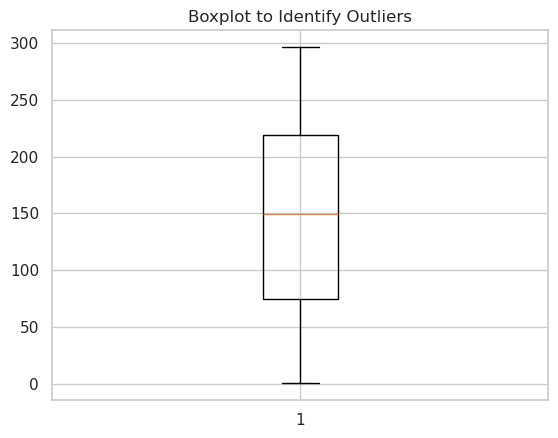

In [37]:
plt.boxplot(file['TV'])
plt.title("Boxplot to Identify Outliers")
plt.show()

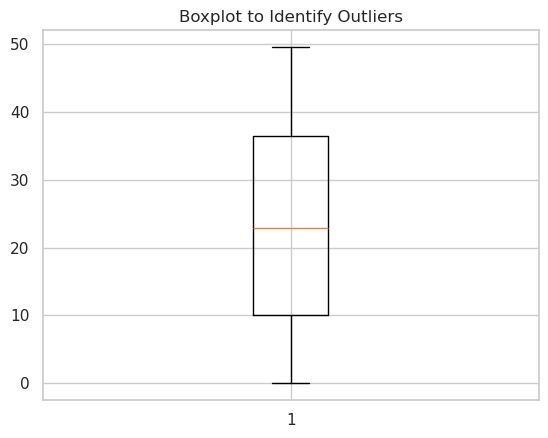

In [38]:
plt.boxplot(file['radio'])
plt.title("Boxplot to Identify Outliers")
plt.show()

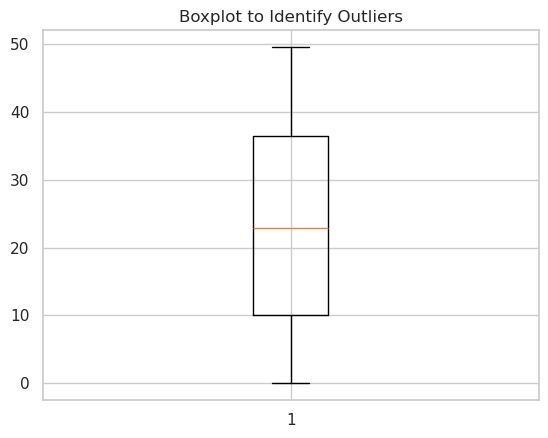

In [39]:
plt.boxplot(file['radio'])
plt.title("Boxplot to Identify Outliers")
plt.show()

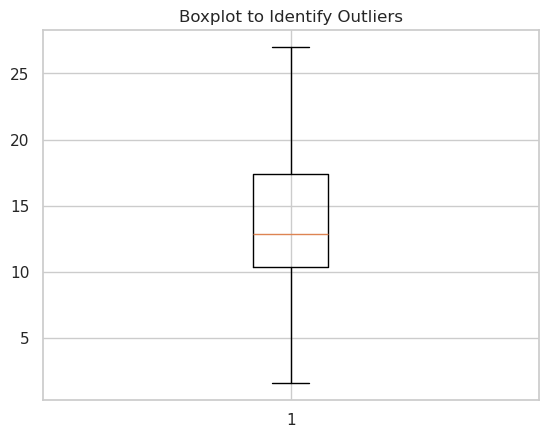

In [40]:

plt.boxplot(file['sales'])
plt.title("Boxplot to Identify Outliers")
plt.show()

In [ ]:
for medium in ['TV', 'radio', 'newspaper']:
    # Sort the data by the medium for a smooth curve
    sorted_data = file.sort_values(by=medium)
    x = sorted_data[medium]
    y = sorted_data['sales']
    
    # Fit a smooth curve using a polynomial fit
    coefficients = np.polyfit(x, y, 3)
    polynomial = np.poly1d(coefficients)
    smooth_x = np.linspace(x.min(), x.max(), 500)
    smooth_y = polynomial(smooth_x)
    
    # Plot
    plt.figure()
    plt.plot(x, y, 'o', label=f"{medium} Data", alpha=0.5)
    plt.plot(smooth_x, smooth_y, '-', label=f"Smooth Curve for {medium}")
    plt.title(f"Sales vs {medium.capitalize()} Budget")
    plt.xlabel(f"{medium.capitalize()} Budget")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:
# Calculate the correlation of sales with each advertising platform
correlations = file[['TV', 'radio', 'newspaper']].corrwith(file['sales'])

# Display the correlations
correlations.sort_values(ascending=False)

TV           0.782224
radio        0.576223
newspaper    0.228299
dtype: float64

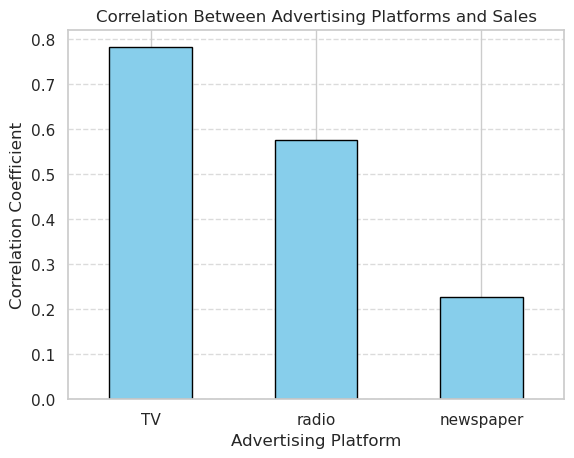

In [43]:
# Plot the correlations as a bar chart
correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Correlation Between Advertising Platforms and Sales")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Advertising Platform")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### All together

In [92]:
data = pd.read_csv('Advertising.csv')


In [93]:
# Data Cleaning Process

# Step 1: Handle Missing Values
missing_values_report = data.isnull().sum()

# Step 2: Remove Duplicates
duplicates_count = data.duplicated().sum()
data_cleaned = data.drop_duplicates()

# Step 3: Standardize Formats (column names to lowercase for consistency)
data_cleaned.columns = data_cleaned.columns.str.lower()

# Step 4: Create Data Quality Report
data_quality_report = pd.DataFrame({
    "Column": data_cleaned.columns,
    "Data Type": data_cleaned.dtypes.values,
    "Missing Values": missing_values_report.values,
    "Duplicates": [duplicates_count if i == 0 else 0 for i in range(len(data_cleaned.columns))],
    "Unique Values": [data_cleaned[col].nunique() for col in data_cleaned.columns]
})

# Display the data quality report
print("Data Quality Report:")
print(data_quality_report)

# Cleaned data preview
print("\nCleaned Data Preview:")
print(data_cleaned.head())

Data Quality Report:
      Column Data Type  Missing Values  Duplicates  Unique Values
0         tv   float64               0           0            190
1      radio   float64               0           0            167
2  newspaper   float64               0           0            172
3      sales   float64               0           0            121

Cleaned Data Preview:
      tv  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


## Machine learning 

In [ ]:
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Plot linear regression models for each advertising platform
for medium in ['TV', 'radio', 'newspaper']:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=medium, y='sales', data=file, ci=None, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"Sales vs {medium.capitalize()} with Linear Regression")
    plt.xlabel(f"{medium.capitalize()} Budget")
    plt.ylabel("Sales")
    plt.show()

## Prediction Model Using Linear Regression

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import io

In [97]:
# Defining the features and target variable
X = file[['TV', 'radio', 'newspaper']]  # Independent variables
y = file['sales']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Displaying a sample of predictions
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions.head())
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 3.1740973539761046
   Actual  Predicted
0    16.9  16.408024
1    22.4  20.889882
2    21.4  21.553843
3     7.3  10.608503
4    24.7  22.112373
R-squared: 0.899438024100912


In [98]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.1740973539761046
Root Mean Squared Error (RMSE): 1.7815996615334502
Mean Absolute Error (MAE): 1.4607567168117606
R-squared (R2): 0.899438024100912


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create separate datasets for each feature
features = ['TV', 'radio', 'newspaper']
results = []

for feature in features:
    # Define X and y for the specific feature
    X = file[[feature]]
    y = file['sales']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results.append({'Feature': feature, 'MSE': mse, 'R-squared': r2, 'Model': model})
    
    # Print results for the current feature
    print(f"\nModel for {feature}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")



Model for TV:
Mean Squared Error: 10.204654118800956
R-squared: 0.6766954295627077

Model for radio:
Mean Squared Error: 23.248766588129108
R-squared: 0.2634309396999791

Model for newspaper:
Mean Squared Error: 30.620733995242567
R-squared: 0.029871749149522175


In [102]:
# Create a DataFrame to compare results
comparison = pd.DataFrame(results).drop(columns='Model')  # Drop the model object for display
comparison = comparison.sort_values(by='R-squared', ascending=False)

# Display the comparison
print(comparison)


     Feature        MSE  R-squared
0         TV  10.204654   0.676695
1      radio  23.248767   0.263431
2  newspaper  30.620734   0.029872


### To make the model better

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [54]:
# Step 2: Create Feature Engineering Pipelines
# Define features to scale
features_to_scale = ['TV', 'radio', 'newspaper']

# Create a scaling pipeline
scaler = StandardScaler()
scaling_pipeline = ColumnTransformer(transformers=[
    ('scaler', scaler, features_to_scale)
], remainder='passthrough')  # Pass other columns unchanged

# Step 3: Apply Normalization and Scaling
scaled_data = scaling_pipeline.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns=['TV_scaled', 'radio_scaled', 'newspaper_scaled', 'sales'])

# Step 4: Generate Derived Metrics for Analysis
# Create interaction terms (e.g., TV and radio advertising combined effect)
scaled_data_df['TV_radio'] = scaled_data_df['TV_scaled'] * scaled_data_df['radio_scaled']
scaled_data_df['radio_newspaper'] = scaled_data_df['radio_scaled'] * scaled_data_df['newspaper_scaled']

# Create ratio metrics
scaled_data_df['radio_to_TV'] = scaled_data_df['radio_scaled'] / (scaled_data_df['TV_scaled'] + 1e-9)  # Avoid division by zero
scaled_data_df['newspaper_to_TV'] = scaled_data_df['newspaper_scaled'] / (scaled_data_df['TV_scaled'] + 1e-9)

# Step 5: Create Aggregated Views
# Generate summary statistics for the dataset
aggregated_view = scaled_data_df.describe()

# Step 6: Display Results
print("\nTransformed Dataset Preview:")
print(scaled_data_df.head())

print("\nAggregated Statistics:")
print(aggregated_view)


Transformed Dataset Preview:
   TV_scaled  radio_scaled  newspaper_scaled  sales  TV_radio  \
0   0.969852      0.981522          1.778945   22.1  0.951932   
1  -1.197376      1.082808          0.669579   10.4 -1.296528   
2  -1.516155      1.528463          1.783549    9.3 -2.317387   
3   0.052050      1.217855          1.286405   18.5  0.063389   
4   0.394182     -0.841614          1.281802   12.9 -0.331749   

   radio_newspaper  radio_to_TV  newspaper_to_TV  
0         1.746075     1.012033         1.834244  
1         0.725025    -0.904317        -0.559205  
2         2.726089    -1.008118        -1.176363  
3         1.566655    23.397932        24.714945  
4        -1.078782    -2.135088         3.251801  

Aggregated Statistics:
          TV_scaled  radio_scaled  newspaper_scaled       sales    TV_radio  \
count  2.000000e+02  2.000000e+02      2.000000e+02  200.000000  200.000000   
mean   1.221245e-16 -4.529710e-16      2.220446e-16   14.022500    0.054809   
std    1.002

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for relationships between features and sales
features_to_plot = ['TV_scaled', 'radio_scaled', 'newspaper_scaled', 'TV_radio', 'radio_newspaper']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=scaled_data_df[feature], y=scaled_data_df['sales'])
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Investigate outliers in derived metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_data_df[['radio_to_TV', 'newspaper_to_TV']])
plt.title('Boxplot of Derived Metrics')
plt.ylabel('Value')
plt.show()


Mean Squared Error: 0.8270625515249478
R-squared: 0.9737969459981106

Sample Predictions:
     Actual  Predicted
95     16.9  16.447745
15     22.4  21.933118
30     21.4  22.158128
158     7.3   8.664689
128    24.7  24.070416


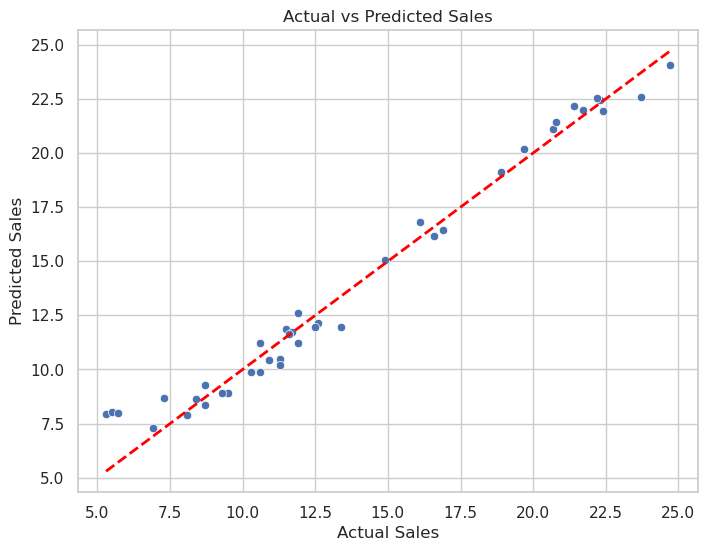

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = scaled_data_df[['TV_scaled', 'radio_scaled', 'newspaper_scaled', 'TV_radio', 'radio_newspaper', 'radio_to_TV', 'newspaper_to_TV']]
y = scaled_data_df['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display actual vs predicted sales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(comparison.head())

# Visualize actual vs predicted sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
features = ['TV_scaled', 'radio_scaled', 'newspaper_scaled']
target = scaled_data_df['sales']

# Loop through each feature
for feature in features:
    print(f"\nModel using feature: {feature}")
    
    # Use only one feature
    X = scaled_data_df[[feature]]
    y = target
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    # Display actual vs predicted sales
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nSample Predictions:")
    print(comparison.head())
    
    # Visualize actual vs predicted sales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f'Actual vs Predicted Sales (Feature: {feature})')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import joblib
import pandas as pd

# Step 1: Define Features and Target
X = scaled_data_df[['TV_scaled', 'radio_scaled', 'newspaper_scaled', 'TV_radio', 'radio_newspaper', 'radio_to_TV', 'newspaper_to_TV']]
y = scaled_data_df['sales']

# Step 2: Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Step 3: Logistic Regression Model (adapted for regression as Linear Regression)
log_reg = LinearRegression()
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='neg_mean_squared_error')

# Train Logistic Regression
log_reg.fit(X, y)
log_reg_mse = -log_reg_cv_scores.mean()

# Step 4: Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf_cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_squared_error')

# Train Random Forest
rf.fit(X, y)
rf_mse = -rf_cv_scores.mean()

# Step 5: Save Models for Versioning
joblib.dump(log_reg, 'logistic_regression_model_v1.pkl')
joblib.dump(rf, 'random_forest_model_v1.pkl')
# Step 6: Display Results
print(f"Logistic Regression Mean Squared Error (CV): {log_reg_mse}")
print(f"Random Forest Mean Squared Error (CV): {rf_mse}")

# Summarize Cross-Validation Scores
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Mean Squared Error': [log_reg_mse, rf_mse]
})

# Print the model comparison table
print("\nModel Comparison:")
print(model_comparison)


Logistic Regression Mean Squared Error (CV): 0.9996709919221534
Random Forest Mean Squared Error (CV): 0.6833565799999993

Model Comparison:
                 Model  Mean Squared Error
0  Logistic Regression            0.999671
1        Random Forest            0.683357


In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Define Features and Target
X = scaled_data_df[['TV_scaled', 'radio_scaled', 'newspaper_scaled', 'TV_radio', 'radio_newspaper', 'radio_to_TV', 'newspaper_to_TV']]
y = scaled_data_df['sales']

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

# Logistic Regression Metrics
log_reg_mse = mean_squared_error(y_test, log_reg_preds)
log_reg_rmse = np.sqrt(log_reg_mse)
log_reg_r2 = r2_score(y_test, log_reg_preds)

# Step 4: Train Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)


# Step 5: Save Metrics in a Table
performance_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Mean Squared Error (MSE)': [log_reg_mse, rf_mse],
    'Root Mean Squared Error (RMSE)': [log_reg_rmse, rf_rmse],
    'R-squared (R²)': [log_reg_r2, rf_r2]
})

# Display Metrics
print("Model Performance Metrics:")
print(performance_metrics)

# Save Metrics for Deployment
performance_metrics.to_csv('model_performance_metrics.csv', index=False)


Model Performance Metrics:
                 Model  Mean Squared Error (MSE)  \
0  Logistic Regression                  0.827063   
1        Random Forest                  0.574304   

   Root Mean Squared Error (RMSE)  R-squared (R²)  
0                        0.909430        0.973797  
1                        0.757828        0.981805  
